# Laptop Price Prediction using Machine Learning
I will create a laptop price prediction project. The statement of the problem is that if any user wants to buy a laptop, then my application must be compatible to provide an initial price of the laptop according to the user's configurations. Although it looks like a simple project or just developing a model, the dataset we have is noisy and needs a lot of feature engineering and pre-processing that will be interesting in developing this project.

**Please note that my project draws inspiration from 'Machine Learning through Examples' by Dr. Alaa Tuaima, as I explore the concepts and techniques outlined in the book to create innovative solutions.**

### Comprehensive Machine Learning Workflow for Regression Analysis
This code snippet imports essential libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn for performing a comprehensive machine learning workflow for regression analysis. 

In [723]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

### Loading and Exploring Laptop Dataset
This code reads a CSV file named 'laptop_data.csv' into a pandas DataFrame, drops the 'Unnamed: 0' column, and displays the first few rows of the dataset using the head() function. It also prints the shape of the DataFrame to show the number of rows and columns in the dataset. 

In [691]:
df = pd.read_csv('laptop_data.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [692]:
df.shape

(1303, 11)

### Cleaning and Transforming Laptop Data - RAM and Weight
This code snippet performs data cleaning and transformation on the 'Ram' and 'Weight' columns of the laptop dataset.

In [693]:
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '').astype('int32')
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '').astype('float32')

In [694]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


### Exploratory Data Analysis of Laptop Features
These codes snippets perform exploratory data analysis on a laptop dataset. They visualize price distribution, price variation across manufacturers (companies), laptop types, screen sizes, touchscreen presence, and IPS screen impact on prices using different plots.

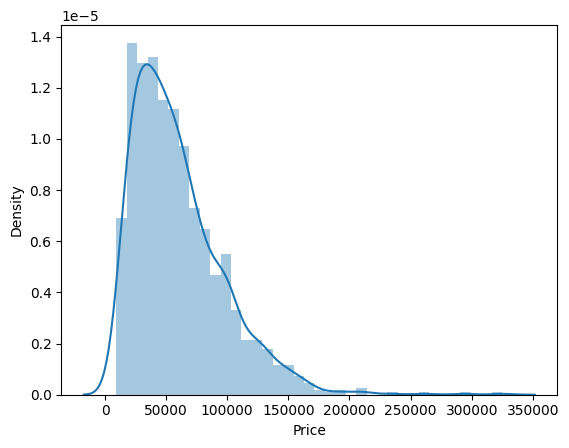

In [695]:
sns.distplot(df['Price'])
plt.show()

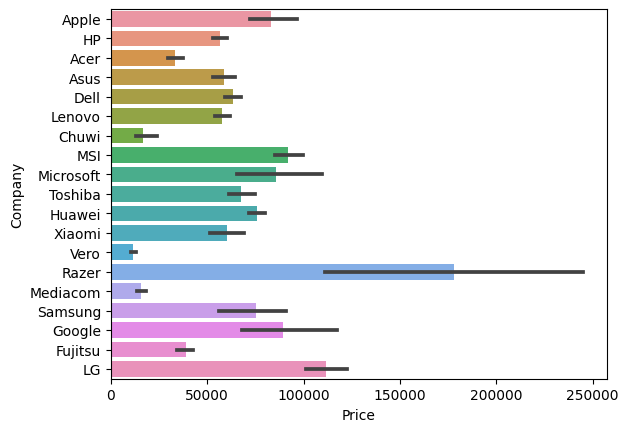

In [696]:
sns.barplot(x=df['Price'], y=df['Company'])
plt.show()

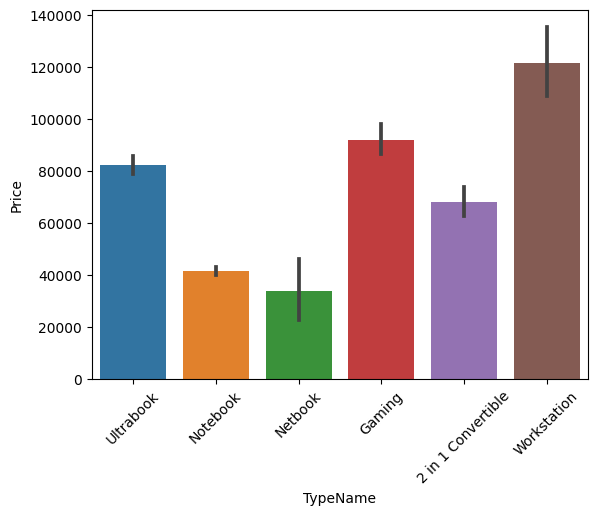

In [697]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

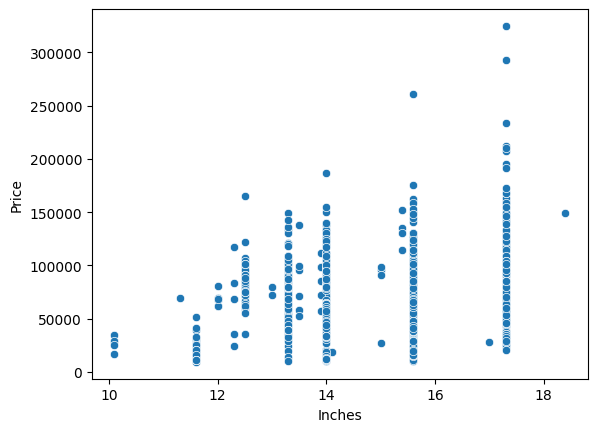

In [698]:
sns.scatterplot(x=df['Inches'], y=df['Price'])
plt.show()

<Axes: xlabel='Touchscreen', ylabel='Price'>

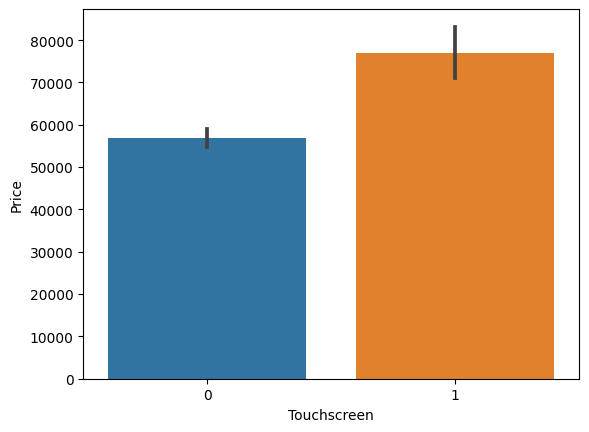

In [699]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
sns.countplot(df['Touchscreen'])
sns.barplot(x=df['Touchscreen'] , y=df['Price'])

<Axes: xlabel='Ips', ylabel='Price'>

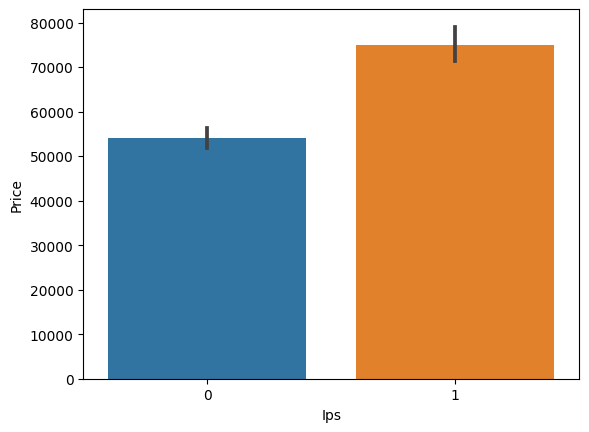

In [700]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x
else 0)
sns.barplot(x=df['Ips'],y=df['Price'])

### Laptop Screen Resolution Analysis & features engineering
This code snippet extracts the X and Y resolutions from the 'ScreenResolution' column of a laptop dataset, calculates the pixel density (PPI) based on screen dimensions, and then calculates the correlation coefficients between numeric columns and laptop prices. It drops unnecessary columns like 'ScreenResolution', 'Inches', 'X_res', and 'Y_res' to streamline the data for further analysis.

In [701]:
def findXresolution(s):
    return int(s.split()[-1].split('x')[0])

def findYresolution(s):
    return int(s.split()[-1].split('x')[1])

df['X_res'] = df['ScreenResolution'].apply(findXresolution)
df['Y_res'] = df['ScreenResolution'].apply(findYresolution)

df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')


In [702]:
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

# Select only the numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation coefficients
correlation = numeric_columns.corr()

# Sort the correlation coefficients for 'Price' column in descending order
price_correlation = correlation['Price'].sort_values(ascending=False)
price_correlation

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Ips            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

In [703]:
df.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'],
inplace=True)

In [704]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


### Processor and RAM Impact on Laptop Price 
This code segment processes the 'Cpu' column to categorize laptop CPUs as either Intel Core i3, i5, i7, Other Intel Processors, or AMD Processors. It then visualizes the relationship between CPU brand and laptop prices using a bar plot. The code also generates another bar plot to demonstrate how different RAM configurations influence laptop prices.

In [705]:
def fetch_processor(x):
    cpu_name = ' '.join(x.split()[0:3])
    if cpu_name == 'Intel Core i3' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i7':
        return cpu_name
    elif cpu_name.split()[0] == 'Intel':
        return 'Other Inter Processor'
    else:
        return 'AMD Processor'

df['CPU_brand'] = df['Cpu'].apply(fetch_processor)


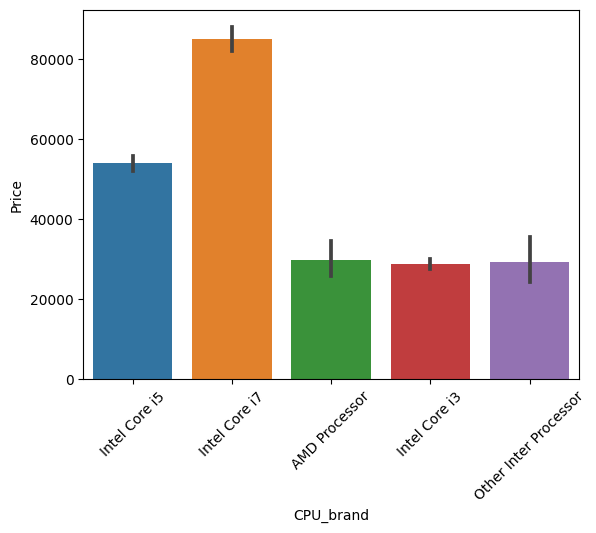

In [706]:
sns.barplot(x=df['CPU_brand'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

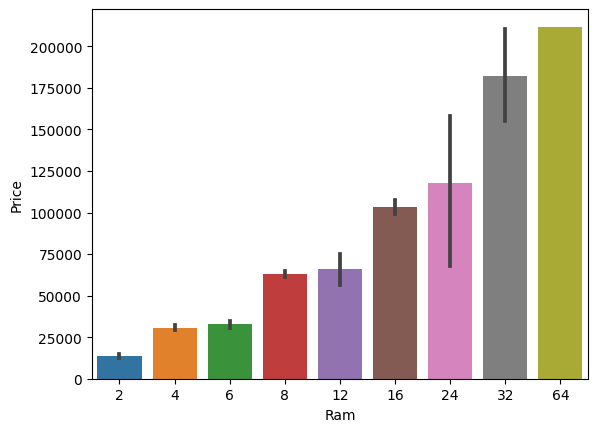

In [707]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.show()

### Memory Configuration Analysis and Feature Engineering
This code snippet demonstrates memory configuration analysis and feature engineering on a dataset of laptops. It preprocesses the 'Memory' column, extracting information about HDD, SSD, Hybrid, and Flash Storage components along with their quantities. The code creates binary columns to represent the presence of each type of memory in the laptop configuration. It then calculates the total HDD, SSD, Hybrid, and Flash Storage capacities based on the extracted information and updates the dataset accordingly. Additionally, the code removes unnecessary columns 'Hybrid', 'Flash_Storage', 'Memory', and 'Cpu' to streamline the dataset for further analysis.

In [708]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [709]:
df['Memory'] = df['Memory'].astype(str).replace('.0', '', regex=True)
df['Memory'] = df['Memory'].astype(str).replace('GB', '', regex=True)
df['Memory'] = df['Memory'].astype(str).replace('TB', '000', regex=True)

new = df["Memory"].str.split("+", n = 1, expand = True)

df['first'] = new[0].str.strip()
df['second'] = new[1]

df['Layer1HDD'] = df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)
df['first'] = df['first'].str.replace(r'[A-Za-z ]+', '', regex=True)

df['second'].fillna('0', inplace=True)
df['Layer2HDD'] = df['second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)
df['second'] = df['second'].str.replace(r'[A-Za-z ]+', '', regex=True)

df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage', 
                   'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'],inplace=True)

df.drop(columns=['Hybrid','Flash_Storage','Memory','Cpu'],inplace=True)

In [710]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU_brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


### GPU Brand Analysis and Data Filtering
This code snippet focuses on analyzing the GPU brand information in a laptop dataset. It extracts the GPU brand from the 'Gpu' column and filters out rows where the GPU brand is labeled as 'ARM'. These rows are then removed from the dataset to ensure data consistency. Finally, the 'Gpu' column is dropped to streamline the dataset for further analysis.

In [711]:
df['GPU_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df = df[df['GPU_brand'] != 'ARM']
df.drop(columns='Gpu', inplace=True)

In [712]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU_brand,HDD,SSD,GPU_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


### Operating System Categorization and Price Analysis
This code segment involves categorizing the laptops' operating systems into distinct groups such as 'Windows', 'Mac', and 'Others/No OS/Linux'. This categorization is done using the 'OpSys' column values. After categorization, the 'OpSys' column is dropped to streamline the dataset. Subsequently, a bar plot is generated to visualize the relationship between different operating systems and their corresponding prices.

In [713]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [714]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

df['OS'] = df['OpSys'].apply(cat_os)
df.drop(columns='OpSys', inplace=True)

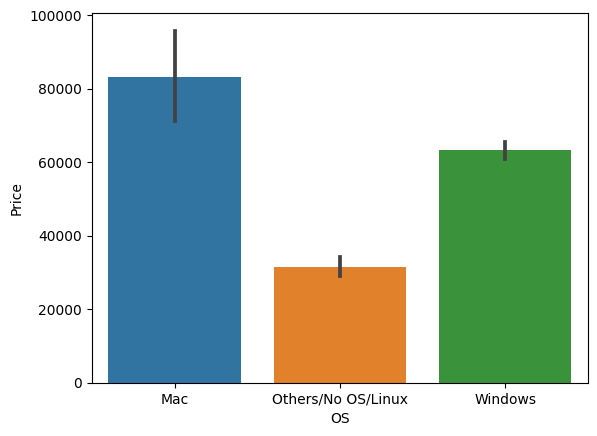

In [715]:
sns.barplot(x=df['OS'], y=df['Price'])
plt.show()

### Price Prediction using RandomForest Regression and Feature Transformation
This code segment begins by visualizing the distribution of the logarithm of laptop prices using a density plot. Then, it prepares the dataset for price prediction by performing logarithmic transformation on the target variable 'Price'. The data is split into training and testing sets using a 85-15 split ratio. The 'ColumnTransformer' step1 is used to preprocess specific columns using one-hot encoding while dropping certain features as indicated by 'drop='first''. After preprocessing, a RandomForestRegressor model is initialized with specified hyperparameters. The preprocessing and modeling steps are combined into a pipeline named 'pipe'. The pipeline is trained on the training data, and predictions are made on the testing data. The R-squared score and Mean Absolute Error (MAE) are computed to evaluate the model's performance on the test data and printed for analysis.

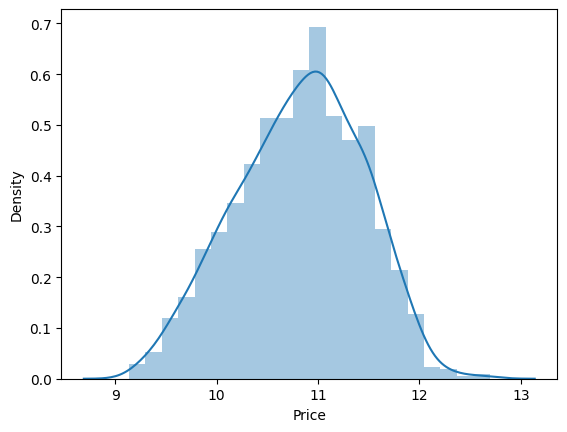

In [716]:
sns.distplot(np.log(df['Price']))
plt.show()

In [717]:
X = data.drop(columns=['Price'])
y = np.log(data['Price'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [722]:
step1 = ColumnTransformer(transformers=[ ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12]) ],remainder='drop')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6029623450857438
MAE 0.31130444974202814
